In [1]:
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

import numpy.polynomial.polynomial as poly
from scipy.integrate import quad
import scipy.misc as misc

3.0


NameError: name 'integral' is not defined

2.0
poly([2.])


In [8]:
epsilon = 0.00001
N = 30
rangeLen = 2.0

In [9]:
def spanishU(x):
    return x

def derSpanishU(x):
    return 1

def B(w,v,derW,derV):
    x = w(2)*v(2)
    y = quad(lambda x : derW(x)*derV(x),0,2)[0]
    z = quad(lambda x: w(x)*v(x),0,2)[0]
    return (w(2)*v(2) - quad(lambda x : derW(x)*derV(x),0,2)[0] + quad(lambda x: w(x)*v(x),0,2)[0])

def L(v,derV):
    return (spanishU(2)*v(2) - quad(lambda x: derSpanishU(x)*derV(x),0,2)[0] + quad(lambda x: spanishU(x)*v(x),0,2)[0])

def e(x,i):
    h = rangeLen/N
    if abs(x-(i*h)) > h or x < 0 or x > 2:
        return 0
    elif x < i*h:
        return (N/2)*x - (i-1)
    elif x >= i*h:
        return -(N/2)*x + (i+1)
    
def getE(i):
    return lambda x: e(x,i)

def derE(x,i):
    h = rangeLen/N
    if abs(x-(i*h)) > h or x < 0 or x > 2:
        return 0
    if x < i*h:
        return (N/2)
    if x >= i*h:
        return -(N/2)
    
def getDerE(i):
    return lambda x: derE(x,i)

C:\Users\witol\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  if __name__ == '__main__':
C:\Users\witol\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably 

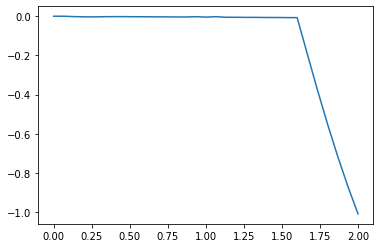

In [11]:
def createBMatrix():
    BMatrix = np.zeros((N,N))
    BMatrix[0][0] = 1
    for i in range(2,N+1):
        for j in range(2,N+1):
            ei = getE(i)
            derEi = getDerE(i)
            ej = getE(j)
            derEj = getDerE(j)
            BMatrix[i-1][j-1] = B(ei,ej,derEi,derEj)     
    return BMatrix

def createLMatrix():
    LMatrix = np.zeros((N,1))
    LMatrix[0][0] = 0
    for i in range(2,N+1):
        ei = getE(i)
        derEi = getDerE(i)
        LMatrix[i-1][0] = L(ei,derEi)
    return LMatrix

def getWeightMatrix(BMatrix,LMatrix):
    return np.linalg.solve(BMatrix,LMatrix)

def getSolution():
    weights = getWeightMatrix(createBMatrix(),createLMatrix())
    return lambda x: sum([weights[i-1] * e(x,i) for i in range(1,N+1)])

def showSolution(u):
    x = []
    y = []
    for i in range (0,N+1):
        x.append(2*i/N)
        y.append(u(2*i/N))
    plt.plot(x,y)
    plt.show()
    
showSolution(getSolution())